In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

### Read all .csv documents from fiji particle analysis

In [21]:
DATA_PATH = r"C:\Users\bankollq\Desktop\Lars Python\MorphologyML\05. GAN\Review\2-SZD\Git\cGAN\01. Notebooks\particle analysis results"


In [22]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]

In [23]:
dataframes = []
files_ = []
for f in files:
    try:
        #print(f)
        frame=pd.read_csv(os.path.join(DATA_PATH,f),header=0)
        dataframes.append(frame)
        files_.append(f)
    except:
       print(f)
df = pd.concat(dataframes)

In [24]:
len(df)

269470

### Split results from experimental/original and predicted images

In [28]:
originals = []
predicted = []
classnames_orig = []
classnames_pred = []


for i in range(len(files_)):
    if files_[i].split('_')[-2] == 'original':
        originals.append(dataframes[i])
        classnames_orig.append(files_[i])
    else:
        predicted.append(dataframes[i])
        classnames_pred.append(files_[i])

print(len(originals))
print(len(predicted))

        


11000
11000


In [29]:
classes = []
for f in files_:
    classes.append(f.rsplit('_',2)[0])
classes_unique = np.unique(classes)


In [31]:
plt.rcParams.update({'font.size': 14,'xtick.major.width' : 1,'ytick.major.width' : 1,'axes.linewidth':1})

In [32]:
mean_orig = []
mean_pred = []
hist_mean_orig = []
hist_mean_pred = []
for f in classes_unique:


    hist = []
    for i in range(len(classnames_orig)):
        if classnames_orig[i].rsplit('_',2)[0] == f:
            hist.append(originals[i])
    hist = pd.concat(hist)
    hist_mean_orig.append(hist.mean(axis=0))
    mean_orig.append(np.round(np.mean(hist['Feret']),2))
    
    hist = []
    for i in range(len(classnames_pred)):
        if classnames_pred[i].rsplit('_',2)[0] == f:
            hist.append(predicted[i])
    hist = pd.concat(hist)
    hist_mean_pred.append(hist.mean(axis=0))

    mean_pred.append(np.round(np.mean(hist['Feret']),2))
    
    

In [35]:
hist_mean_orig = pd.concat(hist_mean_orig)
hist_mean_pred = pd.concat(hist_mean_pred)

Particle attributes

In [36]:
np.unique(hist_mean_pred.index)

array([' ', '%Area', 'AR', 'Angle', 'Area', 'BX', 'BY', 'Circ.', 'Feret',
       'FeretAngle', 'FeretX', 'FeretY', 'Height', 'IntDen', 'Kurt',
       'Major', 'Max', 'Mean', 'Median', 'Min', 'MinFeret', 'Minor',
       'Perim.', 'RawIntDen', 'Round', 'Skew', 'Slice', 'Solidity',
       'StdDev', 'Width', 'X', 'XM', 'Y', 'YM'], dtype=object)

In [37]:
plt.rcParams.update({'font.size': 18,'xtick.major.width' : 1,'ytick.major.width' : 1,'axes.linewidth':1.5})

define particle attributes to evaluate

In [38]:
particle_attributes = ['Feret','Area','Round','Perim.','Circ.']
axes_titles = ['avg. diameter',' avg. area','avg. roundness','avg. perimeter.','avg. circularity']
units = ['px','$px^2$','a.u.','px','a.u.']

### Plot mean particle attributes experimental vs. predicted

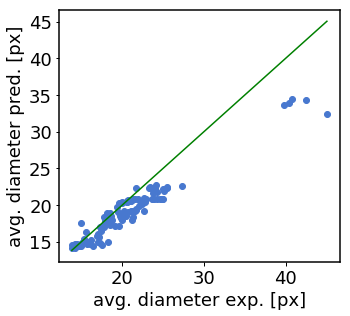

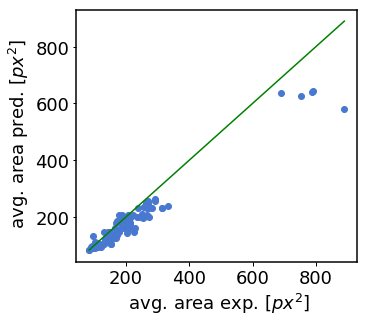

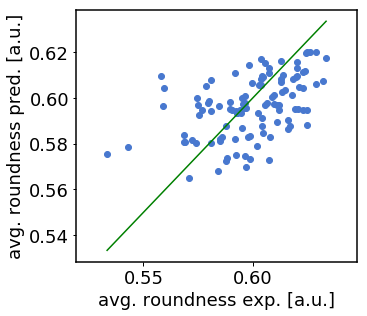

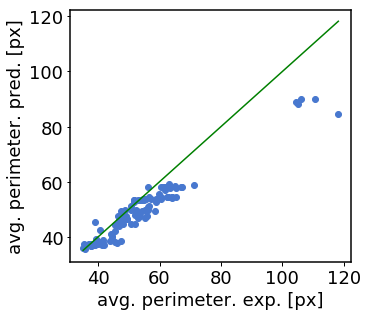

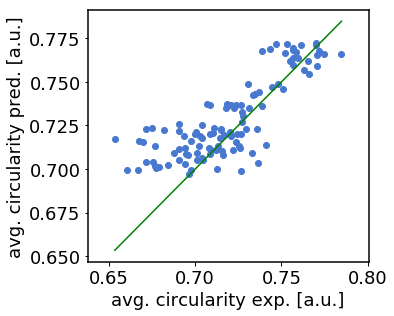

In [56]:
plt.style.use('seaborn-muted')

for attr,unit,title in zip(particle_attributes,units,axes_titles):
    plt.figure(figsize=(6.5,5))
    plt.scatter(hist_mean_orig[attr],hist_mean_pred[attr])
    min_=np.min(hist_mean_orig[attr])
    max_=np.max(hist_mean_orig[attr])
    plt.plot(np.linspace(min_,max_,10),np.linspace(min_,max_,10),c='green')
    #plt.xlim(10,200)
    plt.xlabel(title+' exp. ['+unit+']')
    plt.ylabel(title+' pred. ['+unit+']')
    plt.subplots_adjust(bottom=0.2, left=0.3, top=0.9)

    plt.savefig(str(3)+attr+'.png',dpi=100)
#plt.ylim(10,30)


### Plot histogram of random selection of images 

mean: 89.57074174445448
std: 52.352191105122664
mean: 80.75051907968573
std: 54.397151222312196


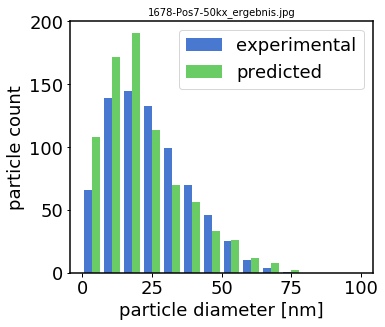

mean: 94.31668413696715
std: 55.27455795006302
mean: 82.84381411928359
std: 47.76586267879405


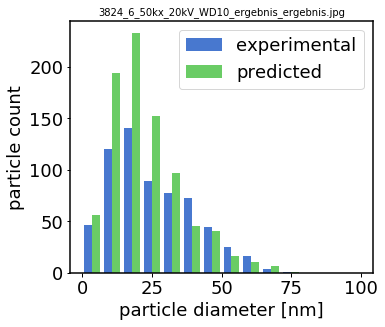

mean: 78.85752055517838
std: 42.056442786791266
mean: 76.92057202057201
std: 45.30076141120152


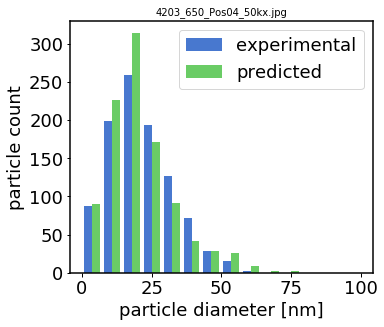

mean: 76.15387356036123
std: 49.261144783723815
mean: 75.51521489403844
std: 47.817372375122005


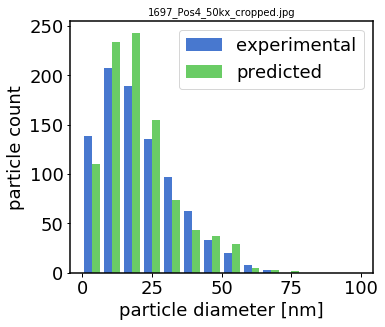

mean: 76.72696460297936
std: 35.302972366295705
mean: 76.587890467276
std: 45.132291839582926


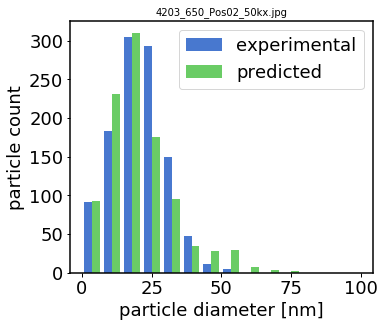

mean: 51.089469928644235
std: 26.469239188348325
mean: 52.424808857114485
std: 24.75530819980259


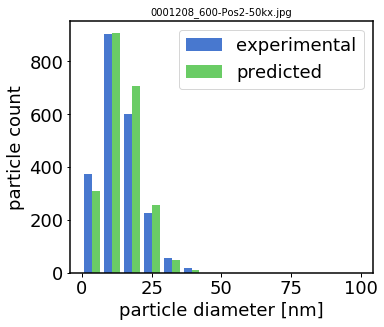

mean: 93.14247199442569
std: 55.142676032144394
mean: 81.25916961547534
std: 54.41897600510282


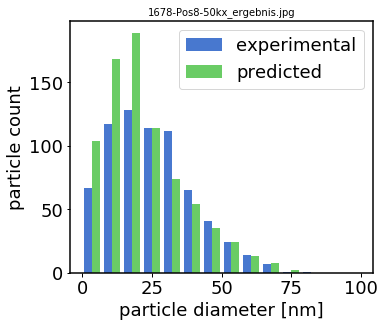

mean: 65.51177946676317
std: 28.182197367563262
mean: 68.14319645732688
std: 34.581502557791


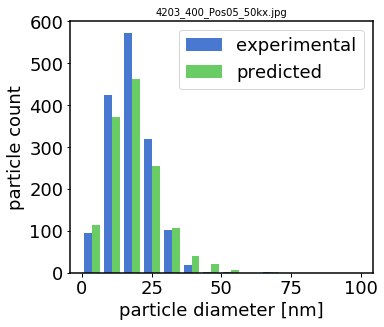

mean: 51.089469928644235
std: 26.469239188348325
mean: 52.424808857114485
std: 24.75530819980259


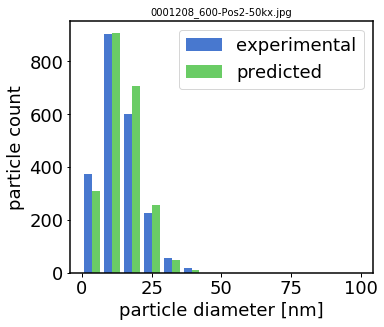

mean: 65.51177946676317
std: 28.182197367563262
mean: 68.14319645732688
std: 34.581502557791


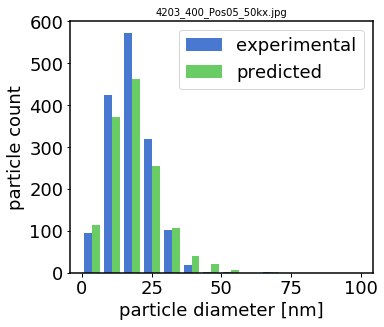

In [57]:
plt.style.use('seaborn-muted')
#Feret = particle diameter
particle_attribute = 'Feret'

for f in classes_unique[np.random.randint(0,len(classes_unique),10)]:
    fig = plt.figure(figsize=(6,5))
    hist_orig = []
    for i in range(len(classnames_orig)):
        if classnames_orig[i].rsplit('_',2)[0] == f:
            #print(i)
            #print(str(f))
            hist_orig.append(originals[i])
    hist_orig = pd.concat(hist_orig)
    print('mean: '+str(hist_orig[particle_attribute].mean(axis=0)/0.27))
    print('std: '+str(hist_orig[particle_attribute].std(axis=0)/0.27))

    hist_pred = []
    for i in range(len(classnames_orig)):
        if classnames_pred[i].rsplit('_',2)[0] == f:
            #print(i)
            #print(str(f))
            hist_pred.append(predicted[i])
    hist_pred = pd.concat(hist_pred)
    print('mean: '+str(hist_pred[particle_attribute].mean(axis=0)/0.27))
    print('std: '+str(hist_pred[particle_attribute].std(axis=0)/0.27))

    bins = np.linspace(0, 100.0, 15)

    plt.hist([hist_orig[particle_attribute], hist_pred[particle_attribute]], bins, label=['experimental', 'predicted'])
    plt.subplots_adjust(bottom=0.2, left=0.2, top=0.9)
    plt.legend(loc='upper right')
    plt.xlabel('particle diameter [nm]')
    plt.ylabel('particle count')
    plt.title(f,fontsize=10)
    #plt.savefig('circularity_'+f+'.png',dpi=100)
    plt.show()
